# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

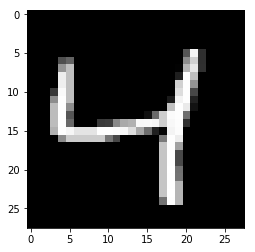

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [20]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 10 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,shape=[None,784])
targets_ = tf.placeholder(tf.float32,shape=[None,784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_,units= encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded,units=784)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.01).minimize(cost)

## Training

In [21]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [22]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6802
Epoch: 1/20... Training loss: 0.6566
Epoch: 1/20... Training loss: 0.6180
Epoch: 1/20... Training loss: 0.5662
Epoch: 1/20... Training loss: 0.5097
Epoch: 1/20... Training loss: 0.4545
Epoch: 1/20... Training loss: 0.4075
Epoch: 1/20... Training loss: 0.3669
Epoch: 1/20... Training loss: 0.3511
Epoch: 1/20... Training loss: 0.3370
Epoch: 1/20... Training loss: 0.3223
Epoch: 1/20... Training loss: 0.3068
Epoch: 1/20... Training loss: 0.3118
Epoch: 1/20... Training loss: 0.3018
Epoch: 1/20... Training loss: 0.3025
Epoch: 1/20... Training loss: 0.2892
Epoch: 1/20... Training loss: 0.2928
Epoch: 1/20... Training loss: 0.2913
Epoch: 1/20... Training loss: 0.2943
Epoch: 1/20... Training loss: 0.2917
Epoch: 1/20... Training loss: 0.2889
Epoch: 1/20... Training loss: 0.2946
Epoch: 1/20... Training loss: 0.2911
Epoch: 1/20... Training loss: 0.2796
Epoch: 1/20... Training loss: 0.2745
Epoch: 1/20... Training loss: 0.2862
E

Epoch: 1/20... Training loss: 0.2115
Epoch: 1/20... Training loss: 0.2149
Epoch: 1/20... Training loss: 0.2165
Epoch: 1/20... Training loss: 0.2112
Epoch: 1/20... Training loss: 0.2176
Epoch: 1/20... Training loss: 0.2084
Epoch: 1/20... Training loss: 0.2076
Epoch: 1/20... Training loss: 0.2103
Epoch: 1/20... Training loss: 0.2102
Epoch: 1/20... Training loss: 0.2165
Epoch: 1/20... Training loss: 0.2114
Epoch: 1/20... Training loss: 0.2155
Epoch: 1/20... Training loss: 0.2093
Epoch: 1/20... Training loss: 0.2087
Epoch: 1/20... Training loss: 0.2088
Epoch: 1/20... Training loss: 0.2136
Epoch: 1/20... Training loss: 0.2095
Epoch: 1/20... Training loss: 0.2075
Epoch: 1/20... Training loss: 0.2120
Epoch: 1/20... Training loss: 0.2154
Epoch: 1/20... Training loss: 0.2100
Epoch: 1/20... Training loss: 0.2172
Epoch: 1/20... Training loss: 0.2096
Epoch: 1/20... Training loss: 0.2031
Epoch: 1/20... Training loss: 0.2165
Epoch: 1/20... Training loss: 0.2121
Epoch: 1/20... Training loss: 0.2041
E

Epoch: 2/20... Training loss: 0.2052
Epoch: 2/20... Training loss: 0.2085
Epoch: 2/20... Training loss: 0.2083
Epoch: 2/20... Training loss: 0.2003
Epoch: 2/20... Training loss: 0.2075
Epoch: 2/20... Training loss: 0.2086
Epoch: 2/20... Training loss: 0.2075
Epoch: 2/20... Training loss: 0.2123
Epoch: 2/20... Training loss: 0.1966
Epoch: 2/20... Training loss: 0.2023
Epoch: 2/20... Training loss: 0.2094
Epoch: 2/20... Training loss: 0.2016
Epoch: 2/20... Training loss: 0.2032
Epoch: 2/20... Training loss: 0.2056
Epoch: 2/20... Training loss: 0.2046
Epoch: 2/20... Training loss: 0.2098
Epoch: 2/20... Training loss: 0.2007
Epoch: 2/20... Training loss: 0.2018
Epoch: 2/20... Training loss: 0.2052
Epoch: 2/20... Training loss: 0.2069
Epoch: 2/20... Training loss: 0.2012
Epoch: 2/20... Training loss: 0.2010
Epoch: 2/20... Training loss: 0.1997
Epoch: 2/20... Training loss: 0.2107
Epoch: 2/20... Training loss: 0.2011
Epoch: 2/20... Training loss: 0.2034
Epoch: 2/20... Training loss: 0.2065
E

Epoch: 3/20... Training loss: 0.2021
Epoch: 3/20... Training loss: 0.2010
Epoch: 3/20... Training loss: 0.2064
Epoch: 3/20... Training loss: 0.2024
Epoch: 3/20... Training loss: 0.2041
Epoch: 3/20... Training loss: 0.2029
Epoch: 3/20... Training loss: 0.2039
Epoch: 3/20... Training loss: 0.2041
Epoch: 3/20... Training loss: 0.2055
Epoch: 3/20... Training loss: 0.2131
Epoch: 3/20... Training loss: 0.2032
Epoch: 3/20... Training loss: 0.2045
Epoch: 3/20... Training loss: 0.2016
Epoch: 3/20... Training loss: 0.2080
Epoch: 3/20... Training loss: 0.2011
Epoch: 3/20... Training loss: 0.2076
Epoch: 3/20... Training loss: 0.1954
Epoch: 3/20... Training loss: 0.2029
Epoch: 3/20... Training loss: 0.1974
Epoch: 3/20... Training loss: 0.2057
Epoch: 3/20... Training loss: 0.2055
Epoch: 3/20... Training loss: 0.2051
Epoch: 3/20... Training loss: 0.2069
Epoch: 3/20... Training loss: 0.2033
Epoch: 3/20... Training loss: 0.2034
Epoch: 3/20... Training loss: 0.2074
Epoch: 3/20... Training loss: 0.2109
E

Epoch: 3/20... Training loss: 0.2096
Epoch: 4/20... Training loss: 0.1968
Epoch: 4/20... Training loss: 0.2057
Epoch: 4/20... Training loss: 0.2060
Epoch: 4/20... Training loss: 0.2009
Epoch: 4/20... Training loss: 0.2017
Epoch: 4/20... Training loss: 0.2042
Epoch: 4/20... Training loss: 0.2036
Epoch: 4/20... Training loss: 0.1968
Epoch: 4/20... Training loss: 0.2029
Epoch: 4/20... Training loss: 0.2005
Epoch: 4/20... Training loss: 0.1999
Epoch: 4/20... Training loss: 0.1973
Epoch: 4/20... Training loss: 0.2011
Epoch: 4/20... Training loss: 0.1985
Epoch: 4/20... Training loss: 0.2095
Epoch: 4/20... Training loss: 0.1974
Epoch: 4/20... Training loss: 0.2045
Epoch: 4/20... Training loss: 0.2065
Epoch: 4/20... Training loss: 0.1983
Epoch: 4/20... Training loss: 0.2016
Epoch: 4/20... Training loss: 0.2058
Epoch: 4/20... Training loss: 0.2015
Epoch: 4/20... Training loss: 0.2015
Epoch: 4/20... Training loss: 0.1977
Epoch: 4/20... Training loss: 0.1975
Epoch: 4/20... Training loss: 0.2043
E

Epoch: 4/20... Training loss: 0.2013
Epoch: 4/20... Training loss: 0.2029
Epoch: 4/20... Training loss: 0.2069
Epoch: 4/20... Training loss: 0.2038
Epoch: 4/20... Training loss: 0.2004
Epoch: 4/20... Training loss: 0.2003
Epoch: 4/20... Training loss: 0.2045
Epoch: 4/20... Training loss: 0.1950
Epoch: 4/20... Training loss: 0.2042
Epoch: 4/20... Training loss: 0.2037
Epoch: 4/20... Training loss: 0.2029
Epoch: 4/20... Training loss: 0.2028
Epoch: 4/20... Training loss: 0.2012
Epoch: 4/20... Training loss: 0.2036
Epoch: 4/20... Training loss: 0.2046
Epoch: 4/20... Training loss: 0.2015
Epoch: 4/20... Training loss: 0.2041
Epoch: 4/20... Training loss: 0.1995
Epoch: 4/20... Training loss: 0.2018
Epoch: 4/20... Training loss: 0.1978
Epoch: 4/20... Training loss: 0.1997
Epoch: 4/20... Training loss: 0.2064
Epoch: 4/20... Training loss: 0.2036
Epoch: 4/20... Training loss: 0.1963
Epoch: 4/20... Training loss: 0.2062
Epoch: 4/20... Training loss: 0.2006
Epoch: 4/20... Training loss: 0.1962
E

Epoch: 5/20... Training loss: 0.2066
Epoch: 5/20... Training loss: 0.2021
Epoch: 5/20... Training loss: 0.1963
Epoch: 5/20... Training loss: 0.1960
Epoch: 5/20... Training loss: 0.2007
Epoch: 5/20... Training loss: 0.2026
Epoch: 5/20... Training loss: 0.2068
Epoch: 5/20... Training loss: 0.2034
Epoch: 5/20... Training loss: 0.1943
Epoch: 5/20... Training loss: 0.2026
Epoch: 5/20... Training loss: 0.1994
Epoch: 5/20... Training loss: 0.1994
Epoch: 5/20... Training loss: 0.2009
Epoch: 5/20... Training loss: 0.2094
Epoch: 5/20... Training loss: 0.2044
Epoch: 5/20... Training loss: 0.1982
Epoch: 5/20... Training loss: 0.2033
Epoch: 5/20... Training loss: 0.1999
Epoch: 5/20... Training loss: 0.1992
Epoch: 5/20... Training loss: 0.2001
Epoch: 5/20... Training loss: 0.2017
Epoch: 5/20... Training loss: 0.1962
Epoch: 5/20... Training loss: 0.2042
Epoch: 5/20... Training loss: 0.2026
Epoch: 5/20... Training loss: 0.1972
Epoch: 5/20... Training loss: 0.2018
Epoch: 5/20... Training loss: 0.2018
E

Epoch: 6/20... Training loss: 0.2057
Epoch: 6/20... Training loss: 0.2003
Epoch: 6/20... Training loss: 0.2068
Epoch: 6/20... Training loss: 0.2022
Epoch: 6/20... Training loss: 0.1963
Epoch: 6/20... Training loss: 0.2035
Epoch: 6/20... Training loss: 0.1975
Epoch: 6/20... Training loss: 0.1937
Epoch: 6/20... Training loss: 0.2063
Epoch: 6/20... Training loss: 0.1966
Epoch: 6/20... Training loss: 0.2065
Epoch: 6/20... Training loss: 0.2017
Epoch: 6/20... Training loss: 0.1945
Epoch: 6/20... Training loss: 0.2063
Epoch: 6/20... Training loss: 0.2042
Epoch: 6/20... Training loss: 0.2019
Epoch: 6/20... Training loss: 0.1994
Epoch: 6/20... Training loss: 0.1936
Epoch: 6/20... Training loss: 0.1970
Epoch: 6/20... Training loss: 0.1960
Epoch: 6/20... Training loss: 0.2013
Epoch: 6/20... Training loss: 0.1990
Epoch: 6/20... Training loss: 0.2033
Epoch: 6/20... Training loss: 0.2000
Epoch: 6/20... Training loss: 0.2104
Epoch: 6/20... Training loss: 0.1991
Epoch: 6/20... Training loss: 0.2064
E

Epoch: 7/20... Training loss: 0.1972
Epoch: 7/20... Training loss: 0.1979
Epoch: 7/20... Training loss: 0.1969
Epoch: 7/20... Training loss: 0.2030
Epoch: 7/20... Training loss: 0.2046
Epoch: 7/20... Training loss: 0.1974
Epoch: 7/20... Training loss: 0.1982
Epoch: 7/20... Training loss: 0.2062
Epoch: 7/20... Training loss: 0.1963
Epoch: 7/20... Training loss: 0.2022
Epoch: 7/20... Training loss: 0.1968
Epoch: 7/20... Training loss: 0.1953
Epoch: 7/20... Training loss: 0.1975
Epoch: 7/20... Training loss: 0.2046
Epoch: 7/20... Training loss: 0.1960
Epoch: 7/20... Training loss: 0.1957
Epoch: 7/20... Training loss: 0.2048
Epoch: 7/20... Training loss: 0.2040
Epoch: 7/20... Training loss: 0.2053
Epoch: 7/20... Training loss: 0.1996
Epoch: 7/20... Training loss: 0.1985
Epoch: 7/20... Training loss: 0.1979
Epoch: 7/20... Training loss: 0.1993
Epoch: 7/20... Training loss: 0.2027
Epoch: 7/20... Training loss: 0.2037
Epoch: 7/20... Training loss: 0.1958
Epoch: 7/20... Training loss: 0.2027
E

Epoch: 7/20... Training loss: 0.1996
Epoch: 7/20... Training loss: 0.2035
Epoch: 7/20... Training loss: 0.2035
Epoch: 7/20... Training loss: 0.1934
Epoch: 7/20... Training loss: 0.2022
Epoch: 7/20... Training loss: 0.1969
Epoch: 7/20... Training loss: 0.2058
Epoch: 7/20... Training loss: 0.1975
Epoch: 7/20... Training loss: 0.1931
Epoch: 7/20... Training loss: 0.1955
Epoch: 7/20... Training loss: 0.2009
Epoch: 7/20... Training loss: 0.1989
Epoch: 7/20... Training loss: 0.2046
Epoch: 7/20... Training loss: 0.1943
Epoch: 7/20... Training loss: 0.2001
Epoch: 7/20... Training loss: 0.1947
Epoch: 7/20... Training loss: 0.1957
Epoch: 7/20... Training loss: 0.1996
Epoch: 7/20... Training loss: 0.1963
Epoch: 7/20... Training loss: 0.2003
Epoch: 7/20... Training loss: 0.1983
Epoch: 7/20... Training loss: 0.2056
Epoch: 7/20... Training loss: 0.2051
Epoch: 7/20... Training loss: 0.2052
Epoch: 7/20... Training loss: 0.1980
Epoch: 7/20... Training loss: 0.1981
Epoch: 7/20... Training loss: 0.2012
E

Epoch: 8/20... Training loss: 0.1986
Epoch: 8/20... Training loss: 0.2061
Epoch: 8/20... Training loss: 0.2002
Epoch: 8/20... Training loss: 0.1943
Epoch: 8/20... Training loss: 0.1993
Epoch: 8/20... Training loss: 0.1963
Epoch: 8/20... Training loss: 0.1976
Epoch: 8/20... Training loss: 0.2018
Epoch: 8/20... Training loss: 0.2018
Epoch: 8/20... Training loss: 0.2003
Epoch: 8/20... Training loss: 0.2028
Epoch: 8/20... Training loss: 0.1978
Epoch: 8/20... Training loss: 0.2047
Epoch: 8/20... Training loss: 0.2044
Epoch: 8/20... Training loss: 0.2001
Epoch: 8/20... Training loss: 0.2064
Epoch: 8/20... Training loss: 0.2050
Epoch: 8/20... Training loss: 0.1975
Epoch: 8/20... Training loss: 0.2003
Epoch: 8/20... Training loss: 0.1977
Epoch: 8/20... Training loss: 0.1937
Epoch: 8/20... Training loss: 0.2038
Epoch: 8/20... Training loss: 0.2046
Epoch: 8/20... Training loss: 0.1977
Epoch: 8/20... Training loss: 0.1958
Epoch: 8/20... Training loss: 0.2021
Epoch: 8/20... Training loss: 0.1978
E

Epoch: 9/20... Training loss: 0.1959
Epoch: 9/20... Training loss: 0.2037
Epoch: 9/20... Training loss: 0.2039
Epoch: 9/20... Training loss: 0.2053
Epoch: 9/20... Training loss: 0.2080
Epoch: 9/20... Training loss: 0.2013
Epoch: 9/20... Training loss: 0.2010
Epoch: 9/20... Training loss: 0.2099
Epoch: 9/20... Training loss: 0.2071
Epoch: 9/20... Training loss: 0.2032
Epoch: 9/20... Training loss: 0.2058
Epoch: 9/20... Training loss: 0.1956
Epoch: 9/20... Training loss: 0.2048
Epoch: 9/20... Training loss: 0.2004
Epoch: 9/20... Training loss: 0.2024
Epoch: 9/20... Training loss: 0.2012
Epoch: 9/20... Training loss: 0.1993
Epoch: 9/20... Training loss: 0.1997
Epoch: 9/20... Training loss: 0.2005
Epoch: 9/20... Training loss: 0.2008
Epoch: 9/20... Training loss: 0.1972
Epoch: 9/20... Training loss: 0.2032
Epoch: 9/20... Training loss: 0.1994
Epoch: 9/20... Training loss: 0.2051
Epoch: 9/20... Training loss: 0.2024
Epoch: 9/20... Training loss: 0.1994
Epoch: 9/20... Training loss: 0.1984
E

Epoch: 10/20... Training loss: 0.1961
Epoch: 10/20... Training loss: 0.1970
Epoch: 10/20... Training loss: 0.1968
Epoch: 10/20... Training loss: 0.1977
Epoch: 10/20... Training loss: 0.1998
Epoch: 10/20... Training loss: 0.1989
Epoch: 10/20... Training loss: 0.1981
Epoch: 10/20... Training loss: 0.2056
Epoch: 10/20... Training loss: 0.2031
Epoch: 10/20... Training loss: 0.1949
Epoch: 10/20... Training loss: 0.2025
Epoch: 10/20... Training loss: 0.2037
Epoch: 10/20... Training loss: 0.1992
Epoch: 10/20... Training loss: 0.1983
Epoch: 10/20... Training loss: 0.2015
Epoch: 10/20... Training loss: 0.1939
Epoch: 10/20... Training loss: 0.1928
Epoch: 10/20... Training loss: 0.2078
Epoch: 10/20... Training loss: 0.2000
Epoch: 10/20... Training loss: 0.2013
Epoch: 10/20... Training loss: 0.1986
Epoch: 10/20... Training loss: 0.1973
Epoch: 10/20... Training loss: 0.2014
Epoch: 10/20... Training loss: 0.1992
Epoch: 10/20... Training loss: 0.2000
Epoch: 10/20... Training loss: 0.1988
Epoch: 10/20

Epoch: 10/20... Training loss: 0.1909
Epoch: 10/20... Training loss: 0.1937
Epoch: 10/20... Training loss: 0.2000
Epoch: 10/20... Training loss: 0.2004
Epoch: 10/20... Training loss: 0.1966
Epoch: 10/20... Training loss: 0.2011
Epoch: 10/20... Training loss: 0.2003
Epoch: 10/20... Training loss: 0.1991
Epoch: 10/20... Training loss: 0.2035
Epoch: 10/20... Training loss: 0.2017
Epoch: 10/20... Training loss: 0.1984
Epoch: 10/20... Training loss: 0.2043
Epoch: 10/20... Training loss: 0.1967
Epoch: 10/20... Training loss: 0.1988
Epoch: 10/20... Training loss: 0.2039
Epoch: 10/20... Training loss: 0.2034
Epoch: 10/20... Training loss: 0.2082
Epoch: 10/20... Training loss: 0.1977
Epoch: 10/20... Training loss: 0.2001
Epoch: 10/20... Training loss: 0.2014
Epoch: 10/20... Training loss: 0.2053
Epoch: 10/20... Training loss: 0.1964
Epoch: 10/20... Training loss: 0.1913
Epoch: 10/20... Training loss: 0.2014
Epoch: 10/20... Training loss: 0.2009
Epoch: 10/20... Training loss: 0.2024
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1980
Epoch: 11/20... Training loss: 0.2028
Epoch: 11/20... Training loss: 0.2005
Epoch: 11/20... Training loss: 0.2006
Epoch: 11/20... Training loss: 0.2051
Epoch: 11/20... Training loss: 0.2056
Epoch: 11/20... Training loss: 0.1993
Epoch: 11/20... Training loss: 0.1938
Epoch: 11/20... Training loss: 0.2067
Epoch: 11/20... Training loss: 0.1975
Epoch: 11/20... Training loss: 0.2004
Epoch: 11/20... Training loss: 0.1993
Epoch: 11/20... Training loss: 0.1975
Epoch: 11/20... Training loss: 0.1980
Epoch: 11/20... Training loss: 0.2016
Epoch: 11/20... Training loss: 0.1944
Epoch: 11/20... Training loss: 0.2034
Epoch: 11/20... Training loss: 0.2015
Epoch: 11/20... Training loss: 0.2011
Epoch: 11/20... Training loss: 0.2024
Epoch: 11/20... Training loss: 0.1983
Epoch: 11/20... Training loss: 0.1976
Epoch: 11/20... Training loss: 0.2070
Epoch: 11/20... Training loss: 0.1996
Epoch: 11/20... Training loss: 0.1961
Epoch: 11/20... Training loss: 0.1982
Epoch: 11/20

Epoch: 12/20... Training loss: 0.2023
Epoch: 12/20... Training loss: 0.2018
Epoch: 12/20... Training loss: 0.2017
Epoch: 12/20... Training loss: 0.2024
Epoch: 12/20... Training loss: 0.1981
Epoch: 12/20... Training loss: 0.2000
Epoch: 12/20... Training loss: 0.2028
Epoch: 12/20... Training loss: 0.1986
Epoch: 12/20... Training loss: 0.1943
Epoch: 12/20... Training loss: 0.2017
Epoch: 12/20... Training loss: 0.1943
Epoch: 12/20... Training loss: 0.2075
Epoch: 12/20... Training loss: 0.1983
Epoch: 12/20... Training loss: 0.2019
Epoch: 12/20... Training loss: 0.1971
Epoch: 12/20... Training loss: 0.2051
Epoch: 12/20... Training loss: 0.1976
Epoch: 12/20... Training loss: 0.1948
Epoch: 12/20... Training loss: 0.1955
Epoch: 12/20... Training loss: 0.1996
Epoch: 12/20... Training loss: 0.2015
Epoch: 12/20... Training loss: 0.1982
Epoch: 12/20... Training loss: 0.2042
Epoch: 12/20... Training loss: 0.1956
Epoch: 12/20... Training loss: 0.2012
Epoch: 12/20... Training loss: 0.1961
Epoch: 12/20

Epoch: 12/20... Training loss: 0.2025
Epoch: 13/20... Training loss: 0.1991
Epoch: 13/20... Training loss: 0.2004
Epoch: 13/20... Training loss: 0.1951
Epoch: 13/20... Training loss: 0.1977
Epoch: 13/20... Training loss: 0.1998
Epoch: 13/20... Training loss: 0.1971
Epoch: 13/20... Training loss: 0.2020
Epoch: 13/20... Training loss: 0.1998
Epoch: 13/20... Training loss: 0.1976
Epoch: 13/20... Training loss: 0.1982
Epoch: 13/20... Training loss: 0.1999
Epoch: 13/20... Training loss: 0.2033
Epoch: 13/20... Training loss: 0.1944
Epoch: 13/20... Training loss: 0.1964
Epoch: 13/20... Training loss: 0.1972
Epoch: 13/20... Training loss: 0.2002
Epoch: 13/20... Training loss: 0.2007
Epoch: 13/20... Training loss: 0.1937
Epoch: 13/20... Training loss: 0.1990
Epoch: 13/20... Training loss: 0.2061
Epoch: 13/20... Training loss: 0.2023
Epoch: 13/20... Training loss: 0.1989
Epoch: 13/20... Training loss: 0.1974
Epoch: 13/20... Training loss: 0.1921
Epoch: 13/20... Training loss: 0.1985
Epoch: 13/20

Epoch: 13/20... Training loss: 0.1978
Epoch: 13/20... Training loss: 0.2060
Epoch: 13/20... Training loss: 0.2004
Epoch: 13/20... Training loss: 0.2052
Epoch: 13/20... Training loss: 0.1934
Epoch: 13/20... Training loss: 0.1966
Epoch: 13/20... Training loss: 0.2049
Epoch: 13/20... Training loss: 0.1966
Epoch: 13/20... Training loss: 0.1965
Epoch: 13/20... Training loss: 0.2037
Epoch: 13/20... Training loss: 0.1952
Epoch: 13/20... Training loss: 0.2044
Epoch: 13/20... Training loss: 0.1978
Epoch: 13/20... Training loss: 0.2010
Epoch: 13/20... Training loss: 0.1995
Epoch: 13/20... Training loss: 0.1972
Epoch: 13/20... Training loss: 0.1997
Epoch: 13/20... Training loss: 0.1969
Epoch: 13/20... Training loss: 0.2010
Epoch: 13/20... Training loss: 0.1992
Epoch: 13/20... Training loss: 0.1955
Epoch: 13/20... Training loss: 0.1998
Epoch: 13/20... Training loss: 0.1977
Epoch: 13/20... Training loss: 0.1946
Epoch: 13/20... Training loss: 0.1997
Epoch: 13/20... Training loss: 0.1992
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1964
Epoch: 14/20... Training loss: 0.1964
Epoch: 14/20... Training loss: 0.1954
Epoch: 14/20... Training loss: 0.2017
Epoch: 14/20... Training loss: 0.2039
Epoch: 14/20... Training loss: 0.1934
Epoch: 14/20... Training loss: 0.1931
Epoch: 14/20... Training loss: 0.1953
Epoch: 14/20... Training loss: 0.1982
Epoch: 14/20... Training loss: 0.2001
Epoch: 14/20... Training loss: 0.2005
Epoch: 14/20... Training loss: 0.1982
Epoch: 14/20... Training loss: 0.1958
Epoch: 14/20... Training loss: 0.1969
Epoch: 14/20... Training loss: 0.2017
Epoch: 14/20... Training loss: 0.2052
Epoch: 14/20... Training loss: 0.1990
Epoch: 14/20... Training loss: 0.1982
Epoch: 14/20... Training loss: 0.1926
Epoch: 14/20... Training loss: 0.2015
Epoch: 14/20... Training loss: 0.1926
Epoch: 14/20... Training loss: 0.2005
Epoch: 14/20... Training loss: 0.1983
Epoch: 14/20... Training loss: 0.2002
Epoch: 14/20... Training loss: 0.2007
Epoch: 14/20... Training loss: 0.1986
Epoch: 14/20

Epoch: 15/20... Training loss: 0.2069
Epoch: 15/20... Training loss: 0.1985
Epoch: 15/20... Training loss: 0.1946
Epoch: 15/20... Training loss: 0.1933
Epoch: 15/20... Training loss: 0.1980
Epoch: 15/20... Training loss: 0.1875
Epoch: 15/20... Training loss: 0.1971
Epoch: 15/20... Training loss: 0.1995
Epoch: 15/20... Training loss: 0.1994
Epoch: 15/20... Training loss: 0.1942
Epoch: 15/20... Training loss: 0.1976
Epoch: 15/20... Training loss: 0.1993
Epoch: 15/20... Training loss: 0.2028
Epoch: 15/20... Training loss: 0.1991
Epoch: 15/20... Training loss: 0.1994
Epoch: 15/20... Training loss: 0.1989
Epoch: 15/20... Training loss: 0.1938
Epoch: 15/20... Training loss: 0.1957
Epoch: 15/20... Training loss: 0.2002
Epoch: 15/20... Training loss: 0.1945
Epoch: 15/20... Training loss: 0.2016
Epoch: 15/20... Training loss: 0.1986
Epoch: 15/20... Training loss: 0.2039
Epoch: 15/20... Training loss: 0.1988
Epoch: 15/20... Training loss: 0.1992
Epoch: 15/20... Training loss: 0.1993
Epoch: 15/20

Epoch: 15/20... Training loss: 0.2035
Epoch: 16/20... Training loss: 0.1986
Epoch: 16/20... Training loss: 0.2046
Epoch: 16/20... Training loss: 0.2017
Epoch: 16/20... Training loss: 0.1963
Epoch: 16/20... Training loss: 0.1971
Epoch: 16/20... Training loss: 0.1988
Epoch: 16/20... Training loss: 0.1979
Epoch: 16/20... Training loss: 0.1950
Epoch: 16/20... Training loss: 0.2066
Epoch: 16/20... Training loss: 0.1945
Epoch: 16/20... Training loss: 0.1971
Epoch: 16/20... Training loss: 0.1976
Epoch: 16/20... Training loss: 0.1993
Epoch: 16/20... Training loss: 0.1911
Epoch: 16/20... Training loss: 0.1969
Epoch: 16/20... Training loss: 0.2006
Epoch: 16/20... Training loss: 0.2022
Epoch: 16/20... Training loss: 0.1945
Epoch: 16/20... Training loss: 0.1974
Epoch: 16/20... Training loss: 0.2016
Epoch: 16/20... Training loss: 0.2028
Epoch: 16/20... Training loss: 0.2075
Epoch: 16/20... Training loss: 0.2034
Epoch: 16/20... Training loss: 0.2022
Epoch: 16/20... Training loss: 0.1995
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1934
Epoch: 16/20... Training loss: 0.2008
Epoch: 16/20... Training loss: 0.1983
Epoch: 16/20... Training loss: 0.1946
Epoch: 16/20... Training loss: 0.2043
Epoch: 16/20... Training loss: 0.2027
Epoch: 16/20... Training loss: 0.1986
Epoch: 16/20... Training loss: 0.1978
Epoch: 16/20... Training loss: 0.1950
Epoch: 16/20... Training loss: 0.2002
Epoch: 16/20... Training loss: 0.2064
Epoch: 16/20... Training loss: 0.1951
Epoch: 16/20... Training loss: 0.1989
Epoch: 16/20... Training loss: 0.2004
Epoch: 16/20... Training loss: 0.1916
Epoch: 16/20... Training loss: 0.1979
Epoch: 16/20... Training loss: 0.2068
Epoch: 16/20... Training loss: 0.1997
Epoch: 16/20... Training loss: 0.1981
Epoch: 16/20... Training loss: 0.1987
Epoch: 16/20... Training loss: 0.1933
Epoch: 16/20... Training loss: 0.1976
Epoch: 16/20... Training loss: 0.2010
Epoch: 16/20... Training loss: 0.2018
Epoch: 16/20... Training loss: 0.1947
Epoch: 16/20... Training loss: 0.1996
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1968
Epoch: 17/20... Training loss: 0.1969
Epoch: 17/20... Training loss: 0.1995
Epoch: 17/20... Training loss: 0.1936
Epoch: 17/20... Training loss: 0.1962
Epoch: 17/20... Training loss: 0.1967
Epoch: 17/20... Training loss: 0.2022
Epoch: 17/20... Training loss: 0.1941
Epoch: 17/20... Training loss: 0.1935
Epoch: 17/20... Training loss: 0.1881
Epoch: 17/20... Training loss: 0.1987
Epoch: 17/20... Training loss: 0.2037
Epoch: 17/20... Training loss: 0.2015
Epoch: 17/20... Training loss: 0.1996
Epoch: 17/20... Training loss: 0.1914
Epoch: 17/20... Training loss: 0.2026
Epoch: 17/20... Training loss: 0.1927
Epoch: 17/20... Training loss: 0.1971
Epoch: 17/20... Training loss: 0.1970
Epoch: 17/20... Training loss: 0.1983
Epoch: 17/20... Training loss: 0.1942
Epoch: 17/20... Training loss: 0.1996
Epoch: 17/20... Training loss: 0.2003
Epoch: 17/20... Training loss: 0.1905
Epoch: 17/20... Training loss: 0.1966
Epoch: 17/20... Training loss: 0.1999
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1999
Epoch: 18/20... Training loss: 0.2004
Epoch: 18/20... Training loss: 0.1909
Epoch: 18/20... Training loss: 0.1951
Epoch: 18/20... Training loss: 0.1992
Epoch: 18/20... Training loss: 0.1947
Epoch: 18/20... Training loss: 0.1942
Epoch: 18/20... Training loss: 0.1977
Epoch: 18/20... Training loss: 0.2023
Epoch: 18/20... Training loss: 0.1947
Epoch: 18/20... Training loss: 0.1960
Epoch: 18/20... Training loss: 0.2049
Epoch: 18/20... Training loss: 0.1963
Epoch: 18/20... Training loss: 0.1914
Epoch: 18/20... Training loss: 0.1994
Epoch: 18/20... Training loss: 0.1936
Epoch: 18/20... Training loss: 0.2024
Epoch: 18/20... Training loss: 0.2025
Epoch: 18/20... Training loss: 0.2008
Epoch: 18/20... Training loss: 0.1947
Epoch: 18/20... Training loss: 0.1963
Epoch: 18/20... Training loss: 0.2048
Epoch: 18/20... Training loss: 0.1975
Epoch: 18/20... Training loss: 0.2027
Epoch: 18/20... Training loss: 0.2030
Epoch: 18/20... Training loss: 0.2030
Epoch: 18/20

Epoch: 18/20... Training loss: 0.1986
Epoch: 18/20... Training loss: 0.2020
Epoch: 18/20... Training loss: 0.2029
Epoch: 18/20... Training loss: 0.1952
Epoch: 18/20... Training loss: 0.1960
Epoch: 18/20... Training loss: 0.2002
Epoch: 18/20... Training loss: 0.1996
Epoch: 18/20... Training loss: 0.2018
Epoch: 18/20... Training loss: 0.1988
Epoch: 18/20... Training loss: 0.1913
Epoch: 19/20... Training loss: 0.1921
Epoch: 19/20... Training loss: 0.1956
Epoch: 19/20... Training loss: 0.1977
Epoch: 19/20... Training loss: 0.1962
Epoch: 19/20... Training loss: 0.1959
Epoch: 19/20... Training loss: 0.2028
Epoch: 19/20... Training loss: 0.1968
Epoch: 19/20... Training loss: 0.1969
Epoch: 19/20... Training loss: 0.1994
Epoch: 19/20... Training loss: 0.2002
Epoch: 19/20... Training loss: 0.2028
Epoch: 19/20... Training loss: 0.2008
Epoch: 19/20... Training loss: 0.1937
Epoch: 19/20... Training loss: 0.1950
Epoch: 19/20... Training loss: 0.2013
Epoch: 19/20... Training loss: 0.1954
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1960
Epoch: 19/20... Training loss: 0.1986
Epoch: 19/20... Training loss: 0.1984
Epoch: 19/20... Training loss: 0.2028
Epoch: 19/20... Training loss: 0.1971
Epoch: 19/20... Training loss: 0.1934
Epoch: 19/20... Training loss: 0.1963
Epoch: 19/20... Training loss: 0.1987
Epoch: 19/20... Training loss: 0.1973
Epoch: 19/20... Training loss: 0.1986
Epoch: 19/20... Training loss: 0.2049
Epoch: 19/20... Training loss: 0.1924
Epoch: 19/20... Training loss: 0.2023
Epoch: 19/20... Training loss: 0.2014
Epoch: 19/20... Training loss: 0.1973
Epoch: 19/20... Training loss: 0.1997
Epoch: 19/20... Training loss: 0.1943
Epoch: 19/20... Training loss: 0.1936
Epoch: 19/20... Training loss: 0.1924
Epoch: 19/20... Training loss: 0.1985
Epoch: 19/20... Training loss: 0.2009
Epoch: 19/20... Training loss: 0.1959
Epoch: 19/20... Training loss: 0.2017
Epoch: 19/20... Training loss: 0.2044
Epoch: 19/20... Training loss: 0.2036
Epoch: 19/20... Training loss: 0.2024
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1963
Epoch: 20/20... Training loss: 0.2015
Epoch: 20/20... Training loss: 0.1998
Epoch: 20/20... Training loss: 0.1930
Epoch: 20/20... Training loss: 0.1992
Epoch: 20/20... Training loss: 0.1977
Epoch: 20/20... Training loss: 0.1910
Epoch: 20/20... Training loss: 0.2063
Epoch: 20/20... Training loss: 0.1988
Epoch: 20/20... Training loss: 0.1983
Epoch: 20/20... Training loss: 0.2038
Epoch: 20/20... Training loss: 0.2004
Epoch: 20/20... Training loss: 0.1985
Epoch: 20/20... Training loss: 0.1969
Epoch: 20/20... Training loss: 0.2005
Epoch: 20/20... Training loss: 0.1956
Epoch: 20/20... Training loss: 0.2024
Epoch: 20/20... Training loss: 0.1945
Epoch: 20/20... Training loss: 0.2004
Epoch: 20/20... Training loss: 0.1951
Epoch: 20/20... Training loss: 0.1975
Epoch: 20/20... Training loss: 0.1984
Epoch: 20/20... Training loss: 0.1965
Epoch: 20/20... Training loss: 0.2020
Epoch: 20/20... Training loss: 0.1992
Epoch: 20/20... Training loss: 0.1948
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

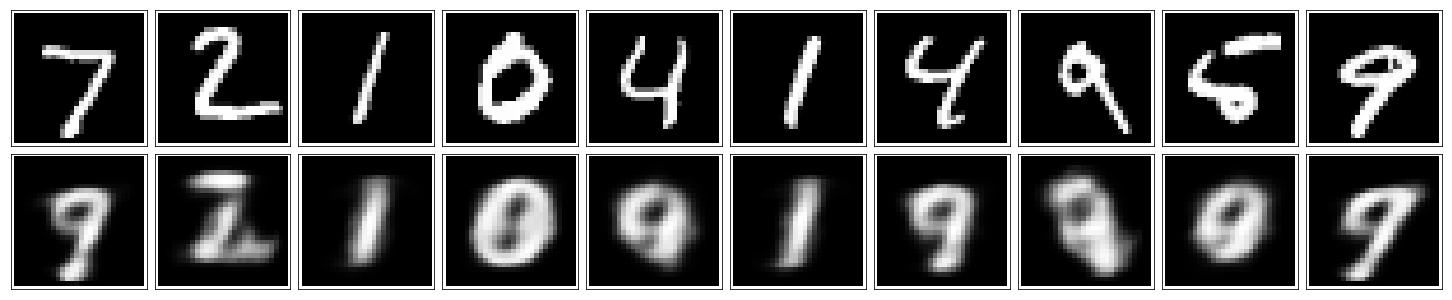

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.